In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import os
import cv2
IMG_SIZE=32

In [4]:
import pandas as pd
df=pd.read_csv(r'C:\Users\gking\Desktop\project\ex\y\data.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [66]:
df.tail()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png
39208,68,69,7,6,62,63,42,Train/42/00042_00007_00029.png


In [74]:
class_id_train=df['ClassId'].to_list()

In [78]:
def create_list(num):
    # Create a list of 42 zeros
    lst = [0] * 43
    # Set the element at index num to 1
    lst[num] = 1
    return lst

class_trained = []
for num in class_id_train:
    class_trained.append(create_list(num))



In [5]:
path=df['Path'].to_list()
path[:4]

['Train/20/00020_00000_00000.png',
 'Train/20/00020_00000_00001.png',
 'Train/20/00020_00000_00002.png',
 'Train/20/00020_00000_00003.png']

In [13]:
import os
os.listdir(r'C:\Users\gking\Desktop\project\data')

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

In [7]:
class_id_train=df['ClassId'].to_list()

In [14]:
base_dir=r'C:\Users\gking\Desktop\project\data'
training_data=[]
for i in tqdm(path):
    img_path=os.path.join(base_dir,i)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)#read_image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    training_data.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 39209/39209 [00:47<00:00, 828.53it/s]


In [68]:
test_df=pd.read_csv(r'C:\Users\gking\Desktop\project\ex\y\test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [72]:
test_df.tail()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png
12629,32,31,6,5,27,26,10,Test/12629.png


In [69]:
class_id_test=test_df['ClassId'].to_list()

In [70]:
test_path=test_df['Path'].to_list()
class_id_test=test_df['ClassId'].to_list()

In [86]:
len(class_id_test)

12630

In [81]:
def create_list(num):
    # Create a list of 42 zeros
    lst = [0] * 43
    # Set the element at index num to 1
    lst[num] = 1
    return lst

class_tested = []
for num in class_id_test:
    class_tested.append(create_list(num))

In [87]:
base_dir=r'C:\Users\gking\Desktop\project\data'
testing_data=[]
for i in tqdm(test_path):
    img_path=os.path.join(base_dir,i)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)#read_image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    testing_data.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 12630/12630 [00:26<00:00, 482.45it/s]


In [88]:
X_train=np.array(training_data)
Y_train=np.array(class_trained)
X_test=np.array(testing_data)
Y_test=np.array(class_tested)

In [89]:
print("Shape of X_train:",X_train.shape,"\nShape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape,"\nShape of Y_test:",Y_test.shape)

Shape of X_train: (39209, 32, 32, 3) 
Shape of Y_train: (39209, 43)
Shape of X_test: (12630, 32, 32, 3) 
Shape of Y_test: (12630, 43)


**Convolution neural network model** 


creating a base CNN model: The input layer of shape 200*200 following with the zero-padding, Then a 2D convolution network layer and a Batch Normalization layer of momentum 0.99 and epsilon 0.001, following with the relu Activation Layer and Pooling, Finnaly a Flatten layer and a Dense layer of Softmax Activation function.

In [90]:
#cnn model

def cnn_model():
  model=tf.keras.Sequential([tf.keras.layers.InputLayer((IMG_SIZE,IMG_SIZE,3)),
                             
                             tf.keras.layers.ZeroPadding2D(padding=(3,3)),

                             tf.keras.layers.Conv2D(filters=32,kernel_size=7,strides=(1,1)),

                             tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones'),

                             tf.keras.layers.ReLU(),

                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(43,activation='softmax'),                             
                             
                             ])
  return model

conv_model=cnn_model() #calling the model
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) #compliing the model

history=conv_model.fit(x=X_train,y=Y_train,epochs=5,validation_data=(X_test,Y_test),batch_size=32) #fitting the CNN model

Epoch 1/5
1226/1226 [==============================] - 101s 81ms/step - loss: 0.7398 - accuracy: 0.8191 - val_loss: 0.5761 - val_accuracy: 0.8625
Epoch 2/5
1226/1226 [==============================] - 91s 74ms/step - loss: 0.1877 - accuracy: 0.9515 - val_loss: 0.8582 - val_accuracy: 0.8219
Epoch 3/5
1226/1226 [==============================] - 90s 73ms/step - loss: 0.1152 - accuracy: 0.9695 - val_loss: 0.6593 - val_accuracy: 0.8857
Epoch 4/5
1226/1226 [==============================] - 90s 74ms/step - loss: 0.1005 - accuracy: 0.9740 - val_loss: 0.6452 - val_accuracy: 0.9016
Epoch 5/5
1226/1226 [==============================] - 89s 73ms/step - loss: 0.0812 - accuracy: 0.9800 - val_loss: 0.5567 - val_accuracy: 0.9040


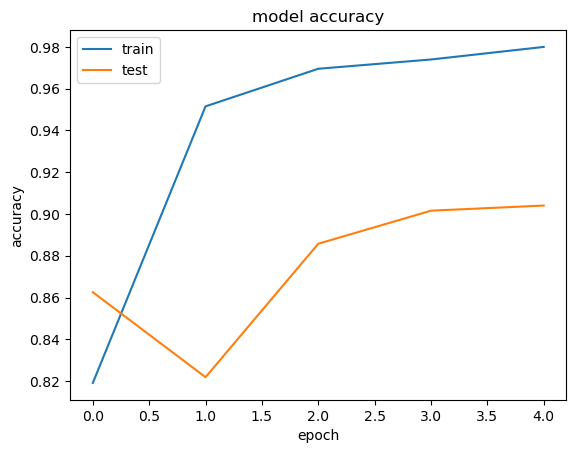

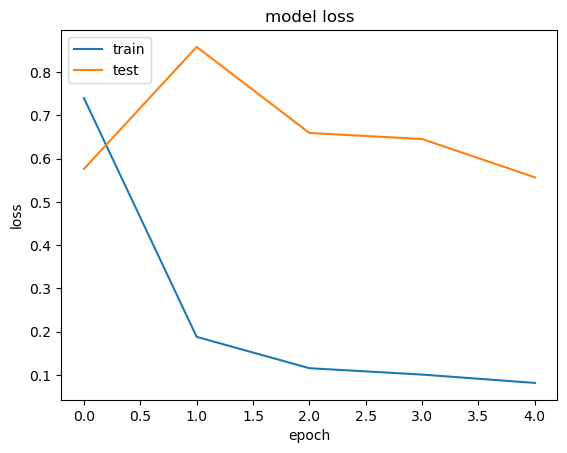

In [91]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
conv_model.save('convolution_model.h5') #Saving the CNN model
conv_model.evaluate(X_test,Y_test) #Evaluating the CNN model

395/395 [==============================] - 8s 20ms/step - loss: 0.5567 - accuracy: 0.9040


[0.5566582679748535, 0.9040380120277405]

**DenseNet Model**


Downloading the pretrained weights for the DenseNet121 model, Changing the input shape for the top layer, adding the Global-Average-pooling layer and then adding a Dense layer of Softmax Activation layer.

In [ ]:
#DenseNet model

base_model=tf.keras.applications.densenet.DenseNet121(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(43, activation="softmax")(x)

densenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
densenet_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=densenet_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

densenet_model.save('/content/drive/MyDrive/chest x-ray/models/DenseNet_model.h5') #Saving the DenseNet model
densenet_model.evaluate(X_test,Y_test) #evaluating the DenseNet model

## **ResNet50**


In [ ]:
#ResNet50

base_model=tf.keras.applications.resnet50.ResNet50(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(43, activation="softmax")(x)

ResNet50_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
ResNet50_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=ResNet50_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
# Defining the process function for processing the imaes while testing 
def process(path):
  img=cv2.imread(path,cv2.IMREAD_COLOR)
  img=cv2.resize(img,(32,32))
  x=img
  img=np.expand_dims(img,axis=0)
  return img,x
def pred_list(pred):
  pred_list=[]
  for i in pred[0]:
    x=format(i,'.8f')
    pred_list.append(x)
  return pred_list

def class_pred(pred_list):
    x=np.argmax(pred_list)
    return x

1/1 [==============================] - 0s 79ms/step
['0.00163585', '0.09144713', '0.37797102', '0.01843912', '0.01264050', '0.02839291', '0.00297966', '0.06455977', '0.01630603', '0.07793337', '0.01075155', '0.03067519', '0.02447815', '0.01115019', '0.00101812', '0.00117111', '0.00524977', '0.02841035', '0.01259100', '0.00299780', '0.00368649', '0.00321886', '0.00498692', '0.00152394', '0.00271829', '0.01008737', '0.00851921', '0.00314999', '0.00146184', '0.00629986', '0.00628990', '0.01766192', '0.00289205', '0.00369320', '0.00035971', '0.02177781', '0.00361403', '0.00201860', '0.01870003', '0.00191346', '0.03996545', '0.00287848', '0.01178404']
Class predicted 2


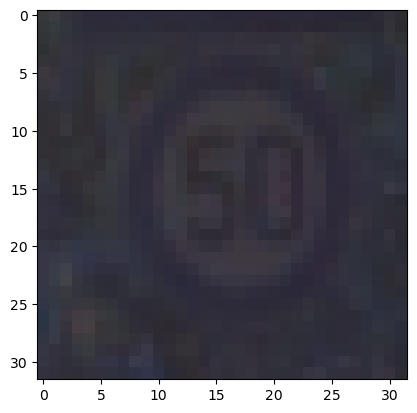

In [97]:
path=r'C:\Users\gking\Desktop\project\data\Train\2\00002_00000_00000.png'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
print("Class predicted",class_pred(pred))
plt.imshow(x)


1/1 [==============================] - 0s 81ms/step
['0.00000000', '0.00000000', '0.00000546', '0.00000000', '0.00000000', '0.00000020', '0.00000000', '0.00001907', '0.00000000', '0.00000959', '0.99996507', '0.00000001', '0.00000002', '0.00000000', '0.00000000', '0.00000000', '0.00000048', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000001', '0.00000000', '0.00000000', '0.00000001', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000000', '0.00000004', '0.00000008']
Class predicted 10


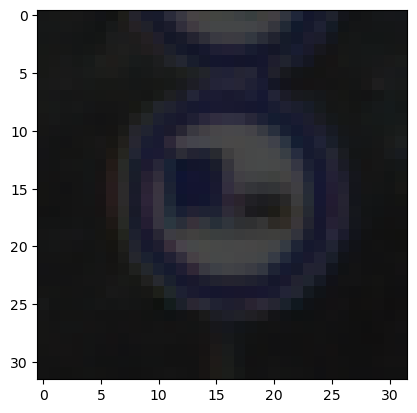

In [98]:
path=r'C:\Users\gking\Desktop\project\data\Train\10\00010_00000_00000.png'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
print("Class predicted",class_pred(pred))
plt.imshow(x)